<a href="https://colab.research.google.com/github/huynhhoanghuy/MS_AdvImageProcessing/blob/main/21C11011_K31_IPCV_2021_LQN_basic_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Họ và tên: Huỳnh Hoàng Huy

MSHV: 21C11011

-------------------------------------------------------------

#Tự đánh giá

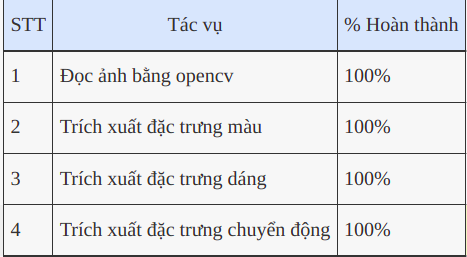

-----------------------------------------
# Mã nguồn

1) Tải ảnh và cài thư viện opencv

In [1]:
#tải về ảnh sample
!wget http://www.ess.ic.kanagawa-it.ac.jp/std_img/colorimage/Lenna.jpg

# sử dụng phiên bản opencv 3.x
!pip install opencv-python==3.4.8.29
!pip install opencv-contrib-python==3.4.8.29

--2022-12-09 03:40:22--  http://www.ess.ic.kanagawa-it.ac.jp/std_img/colorimage/Lenna.jpg
Resolving www.ess.ic.kanagawa-it.ac.jp (www.ess.ic.kanagawa-it.ac.jp)... 202.250.66.20
Connecting to www.ess.ic.kanagawa-it.ac.jp (www.ess.ic.kanagawa-it.ac.jp)|202.250.66.20|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7248 (7.1K) [image/jpeg]
Saving to: ‘Lenna.jpg’

Lenna.jpg           100%[===================>]   7.08K  --.-KB/s    in 0s      

2022-12-09 03:40:22 (444 MB/s) - ‘Lenna.jpg’ saved [7248/7248]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 28.3 MB 1.4 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.6.0.66
    Uninstalling opencv-python-4.6.0.66:
      Successfully uninstalled opencv-python-4.6.0.66
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |█████████████████

2) Import thư viện cần thiết và đọc ảnh

In [2]:
#import các lib cần thiết, colab sẽ có sẵn một số thư viện phổ biến, nếu không có có thể cài đặt thêm
import numpy as np
import cv2 #pip install opencv-python
%matplotlib inline
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

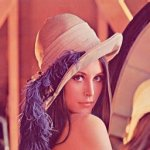

In [3]:
# cv2.IMREAD_COLOR sẽ được giải mã theo thứ tự B G R.
img = cv2.imread('Lenna.jpg',  cv2.IMREAD_UNCHANGED)
cv2_imshow(img) #do google colab không thể sử dụng cv2.imshow() nên sử dụng thư viện của google để gọi hàm tương đương cv2_imshow()

# 3) Đặc trưng màu

raw image:


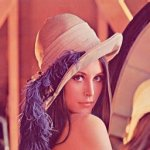

hsv image:


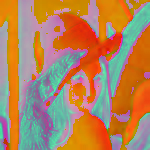

lọc lấy đuôi nón


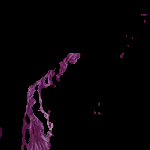

lược đồ màu


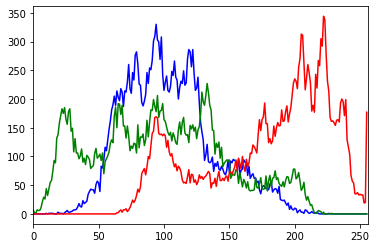

In [4]:
image = cv2.imread('Lenna.jpg',cv2.IMREAD_UNCHANGED)
print("raw image:")
cv2_imshow(image)
## convert to hsv
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
print("hsv image:")
cv2_imshow(hsv)

## mask của đuôi nón (150, 0, 0) ~ (160, 255,255)
mask1 = cv2.inRange(hsv, (150, 0, 0), (160, 255,255))


target = cv2.bitwise_and(image,image, mask=mask1)
print("lọc lấy đuôi nón")
cv2_imshow(target)


print("lược đồ màu")
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


# 4) Đặc trưng dáng

Note: Đường viền (contour)  là một đường cong nối tất cả các điểm liên tục (dọc theo đường biên), có cùng màu hoặc cường độ.

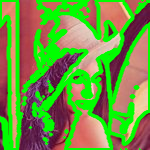

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# converting image into grayscale image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# chỉnh threshold của gray image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# using a findContours() function
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
_,contours, hierarchy = cv2.findContours(image=threshold, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                      
# draw contours on the original image
image_copy = image.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
                
# see the results

cv2_imshow(image_copy)



# 5) Đặc trưng chuyển động

Sử dụng Sobel để tính đạo hàm theo trục x và y, sau đó ta sẽ tính được ma trận gradient có hướng của cả bức ảnh

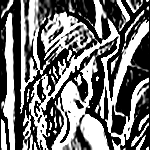

(Text(0.5, 1.0, 'Sobel Y'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

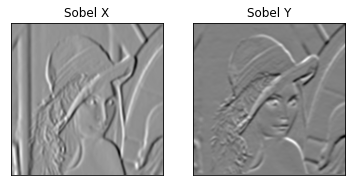

In [9]:
sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)

cv2_imshow(sobelx)


plt.subplot(1,2,1),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])




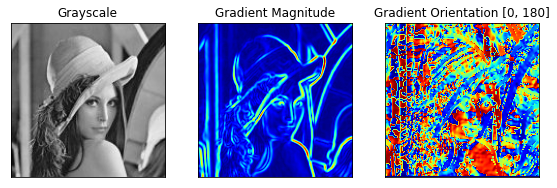

In [10]:
# compute the gradient magnitude and orientation
magnitude = np.sqrt((sobelx ** 2) + (sobely ** 2))
orientation = np.arctan2(sobely, sobelx) * (180 / np.pi) % 180

# initialize a figure to display the input grayscale image along with
# the gradient magnitude and orientation representations, respectively
(fig, axs) = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))
# plot each of the images
axs[0].imshow(gray, cmap="gray")
axs[1].imshow(magnitude, cmap="jet")
axs[2].imshow(orientation, cmap="jet")
# set the titles of each axes
axs[0].set_title("Grayscale")
axs[1].set_title("Gradient Magnitude")
axs[2].set_title("Gradient Orientation [0, 180]")
# loop over each of the axes and turn off the x and y ticks
for i in range(0, 3):
	axs[i].get_xaxis().set_ticks([])
	axs[i].get_yaxis().set_ticks([])
# show the plots
plt.tight_layout()
plt.show()


Phần giữa hiển thị cường độ gradient bằng cách sử dụng Jet colormap.

Vùng xanh lam thể hiện cường độ gradient tại đó nhỏ. Ví dụ: nền của hình ảnh có độ dốc bằng 0 vì không có độ dốc ở đó.

Vùng màu đỏ vàng thể hiện cường độ gradient tại đó lớn. Nhìn vào đường viền của cái nón, ta có thể thấy rằng các pixel này có độ dốc lớn do chúng chứa thông tin về cạnh.

Ở hình cuối cùng, em hiển thị thông tin gradient orientation bằng cách sử dụng Jet colormap. Các giá trị ở đây nằm trong phạm vi [0, 180], trong đó các giá trị gần bằng 0 hiển thị màu xanh lam và các giá trị gần 180 hiển thị màu đỏ. 


---------------------------------------------
Hết